# What drives the price of a car?

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Determine Business Objectives:**

The data task at hand is to analyze a dataset containing information on 426K used cars, with the aim of identifying the key drivers that influence their prices. The goal of this project is to provide recommendations based on our data analysis, to inform the used car dealership's business strategy and improve their profitability. 

**Assess the Situation:**

We have a csv file of 426K instances of used cars, with several columns of attributes, 18 to be exact. Used car dealerships need additional rigour, more than sales persons' intuition of knowing what caused the prices to increase. Our resources include sklearn, and other libararies available to us. Some risks include not having enough clear data to help us produce clear models we can rely on. It is unknown how many fields may have NA data in them.

**Determine Data Mining Goals:**

By conducting the following: 
1. Data Cleaning
2. Feature Engineering
3. Exporatory data analysis
4. And business several predictive models 

We plan on idntifyingthe relative importance in predicting car prices.

**Produce Project Plan:**
1. Data Exporation and Visualization
    1. Check the data size and structure using pandas
    2. Check for missing values and outliers using pandas and numpy
    3. Explore the distribution of values in each column using pandas and seaborn
    4. Visualize the data using matplotlib and seaborn to indentify any correlations or patterns
    5. Determine which attributes are most relevant at this stage of the process.
2. Feature Engineering
    1. Create new features (i.e. we will create a new 'age' feature)
    2. Transform data types and values as needed, such as converting categorical columns to numeric values via encoding.
    3. Handle missing values and outliers by imputing or removing
    4. Normalize or scale the data if necessary to improve model performance
3. Regression Analysis
    1. Define the problem statement and the target variable as the car's price
    2. Select relevant features for the regresison model based on their correlations to the target variable
    3. Split the data into training and test sets using sklearn
    4. Traing a regression using linear regression first.
    5. Evaluate the performance of the model on the test set using metrics (MSE)
    6. ID which features are the most significant predictors of the target variable using feature importance scores.
    7. Interpret the coefficients and the overall performance of the model.
4. Recommendations
    1. Summarize the finadings from a data exploration, feature engineering, regression analysis, and statistical inference.
    2. PRovide clear recommendations based on insights gained from the analysis.
    3. Evaluate the limitations and assumptions of the analysis and provide recommendations for future work.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
# Loading the dataset into a pandas DataFrame
df = pd.read_csv('data/vehicles.csv')

In [3]:
# Displaying the number of rows and columns in the dataset
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  426880
Number of columns:  18


In [4]:
# Displaying the columns in the dataset
print("Columns in the dataset:\n", df.columns)

Columns in the dataset:
 Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [5]:
# Display the column names, data types, and unique values for each column
for col in df.columns:
    unique_values = df[col].unique()
    if df[col].dtype == 'object':
        print(f"{col} ({df[col].dtype}): {unique_values}")
    else:
        print(f"{col} ({df[col].dtype}): {df[col].nunique()} unique values, {df[col].isna().sum()} missing values")

id (int64): 426880 unique values, 0 missing values
region (object): ['knoxville' 'eugene' 'delaware' 'south jersey' 'modesto' 'frederick'
 'indianapolis' 'humboldt county' 'birmingham' 'atlanta' 'asheville'
 'akron / canton' 'stillwater' "spokane / coeur d'alene" 'muskegon'
 'ann arbor' 'nashville' 'raleigh / durham / CH' 'dothan'
 'mcallen / edinburg' 'youngstown' 'jackson' 'mansfield' 'orlando'
 'new hampshire' 'altoona-johnstown' 'ventura county' 'north dakota'
 'abilene' 'college station' 'killeen / temple / ft hood' 'waco'
 'terre haute' 'memphis' 'southwest MS' 'minneapolis / st paul'
 'fresno / madera' 'charlotte' 'new haven' 'eastern CT' 'eau claire'
 'ft myers / SW florida' 'texoma' 'fort collins / north CO' 'bloomington'
 'saginaw-midland-baycity' 'south florida' 'east idaho' 'palm springs'
 'washington, DC' 'winchester' 'new orleans' 'oklahoma city'
 'dallas / fort worth' 'houston' 'joplin' 'corvallis/albany' 'chattanooga'
 'milwaukee' 'el paso' 'hawaii' 'orange county' 'lon

In [6]:
column_types = df.dtypes
print(column_types)

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [7]:
categorical_columns = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

region: ['knoxville' 'eugene' 'delaware' 'south jersey' 'modesto' 'frederick'
 'indianapolis' 'humboldt county' 'birmingham' 'atlanta' 'asheville'
 'akron / canton' 'stillwater' "spokane / coeur d'alene" 'muskegon'
 'ann arbor' 'nashville' 'raleigh / durham / CH' 'dothan'
 'mcallen / edinburg' 'youngstown' 'jackson' 'mansfield' 'orlando'
 'new hampshire' 'altoona-johnstown' 'ventura county' 'north dakota'
 'abilene' 'college station' 'killeen / temple / ft hood' 'waco'
 'terre haute' 'memphis' 'southwest MS' 'minneapolis / st paul'
 'fresno / madera' 'charlotte' 'new haven' 'eastern CT' 'eau claire'
 'ft myers / SW florida' 'texoma' 'fort collins / north CO' 'bloomington'
 'saginaw-midland-baycity' 'south florida' 'east idaho' 'palm springs'
 'washington, DC' 'winchester' 'new orleans' 'oklahoma city'
 'dallas / fort worth' 'houston' 'joplin' 'corvallis/albany' 'chattanooga'
 'milwaukee' 'el paso' 'hawaii' 'orange county' 'long island'
 'springfield' 'san diego' 'los angeles' 'gold cou

In [8]:
# Checking for missing values
print("Number of missing values:\n", df.isnull().sum())

Number of missing values:
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [9]:
# Checking for outliers using numpy
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
outliers = df[(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))].count()
print("Number of outliers:\n", outliers)

/var/folders/1h/1dkls7hx6n9fyppzmlbw0vy80000gn/T/ipykernel_1671/607160374.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))].count()


Number of outliers:
 id                 44
region              0
price            8177
year            15896
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         4385
title_status        0
transmission        0
VIN                 0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64


/Users/victormcguire/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


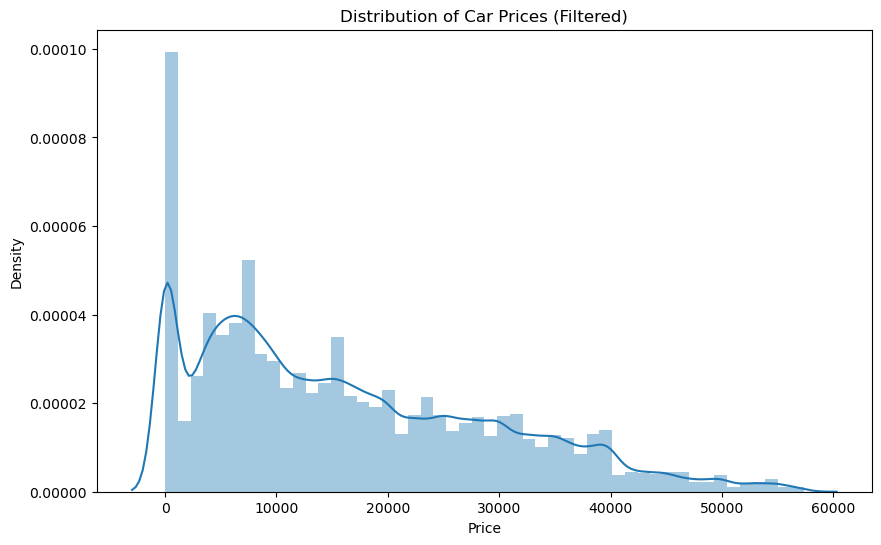

In [10]:
#Removing outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

plt.figure(figsize=(10, 6))
sns.distplot(df_filtered['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Car Prices (Filtered)')
plt.show()

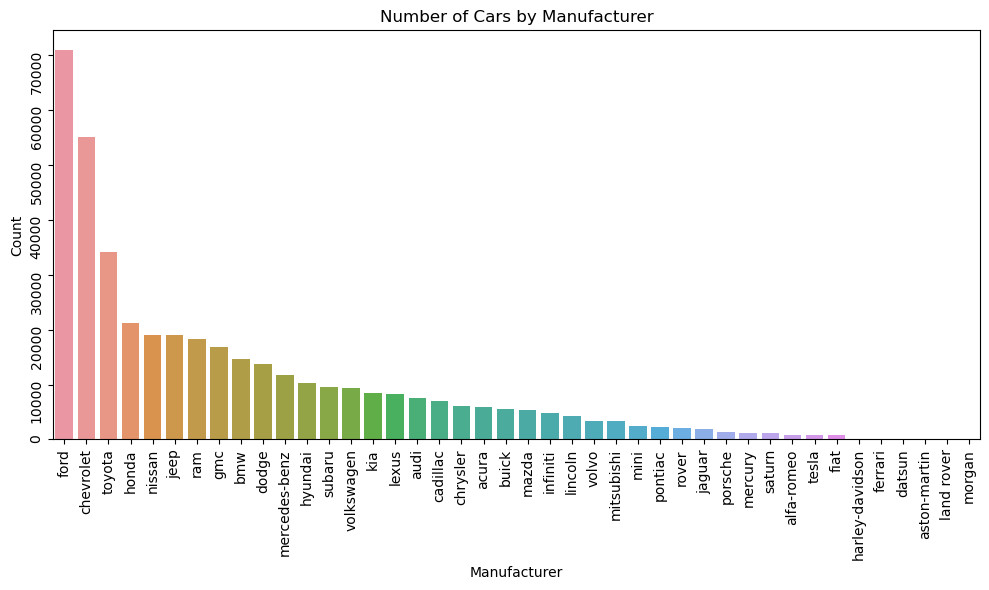

In [11]:
# Plot count of each manufacturer

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the count of each manufacturer, ordered by frequency
sns.countplot(x='manufacturer', data=df, order=df['manufacturer'].value_counts().index, ax=ax)

# Rotate the x-axis labels for readability
ax.tick_params(labelrotation=90)

# Set the x and y axis labels
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Count')

# Set the plot title
ax.set_title('Number of Cars by Manufacturer')

# Scale the plot appropriately for readability
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Select columns to explore
cols_to_explore = ['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

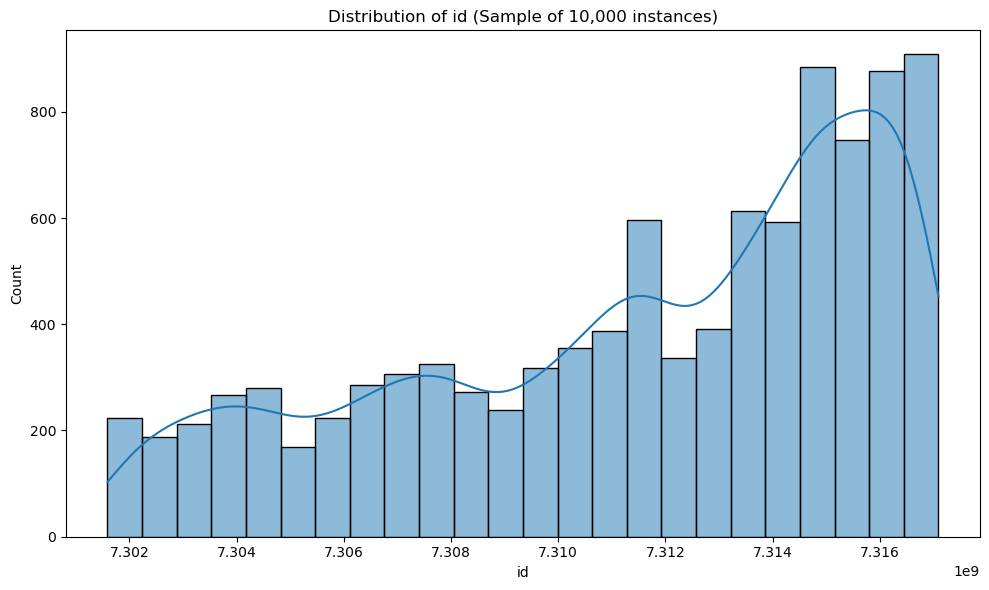

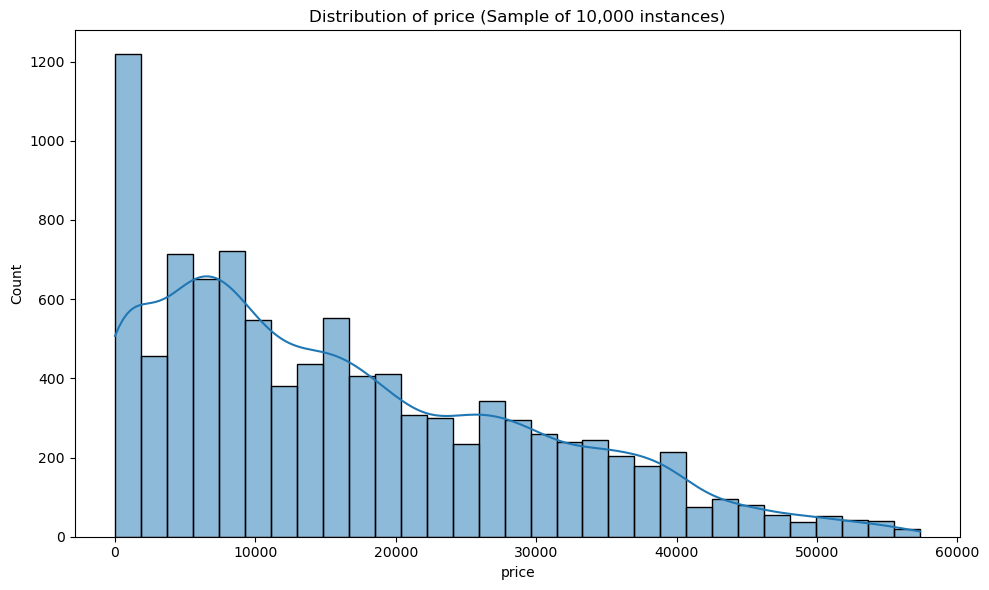

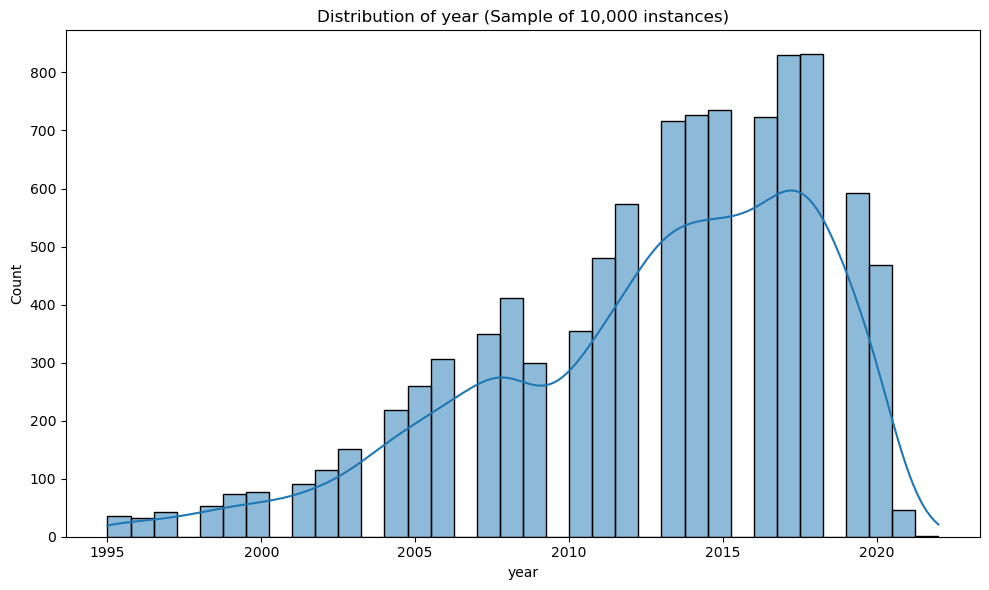

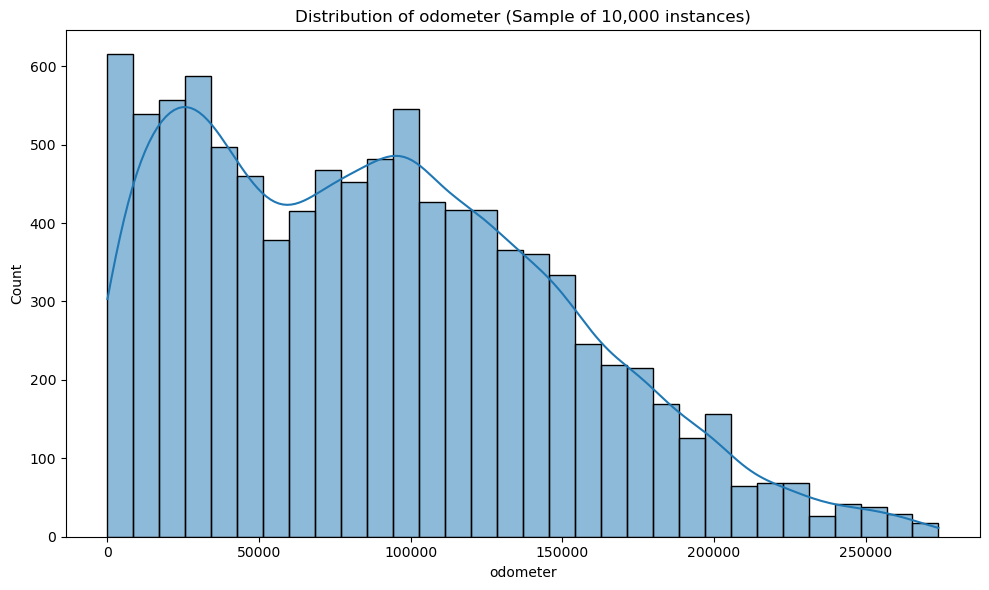

In [13]:
# Select columns to explore
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Loop over columns and plot distribution
for col in num_cols:
    # Sample 10,000 instances from the column
    col_sample = df[col].sample(n=10000, random_state=1)
    
    # Remove outliers
    q1 = col_sample.quantile(0.25)
    q3 = col_sample.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    col_sample = col_sample[(col_sample >= lower_bound) & (col_sample <= upper_bound)]
    
    # Plot the distribution of values for the column
    plt.figure(figsize=(10,6))
    sns.histplot(x=col_sample, kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col} (Sample of 10,000 instances)')
    plt.tight_layout()
    plt.show()

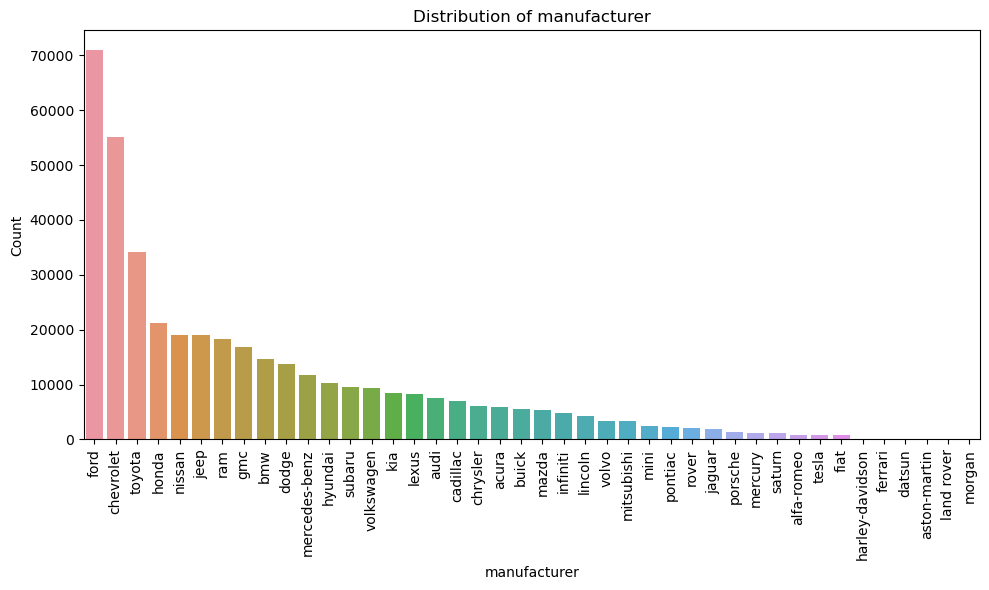

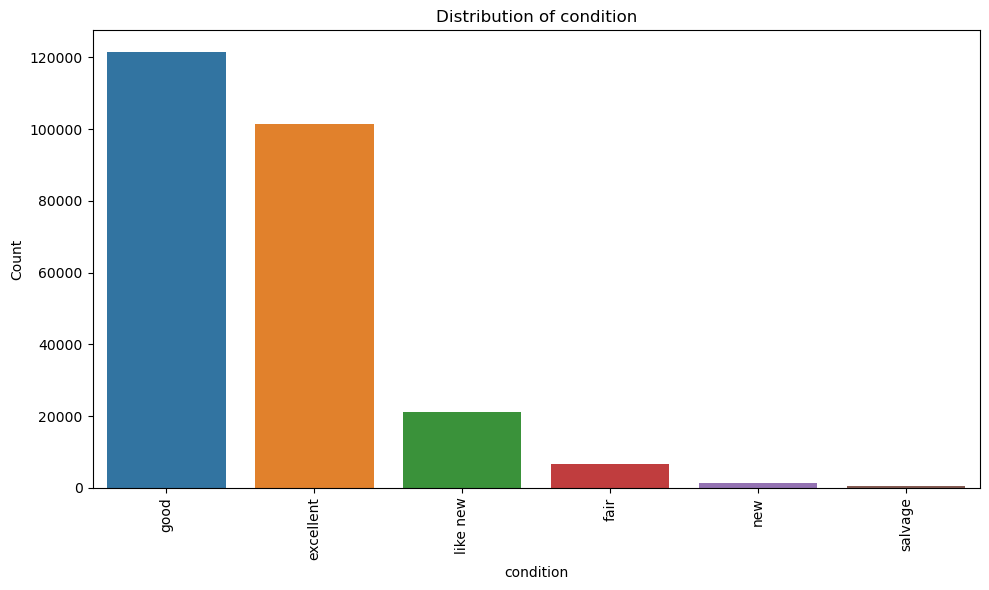

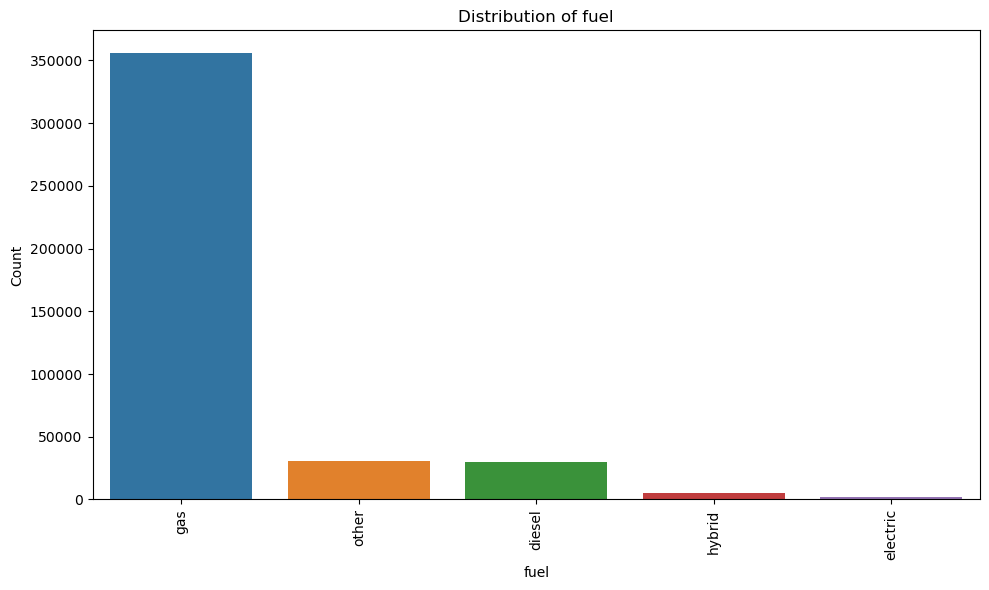

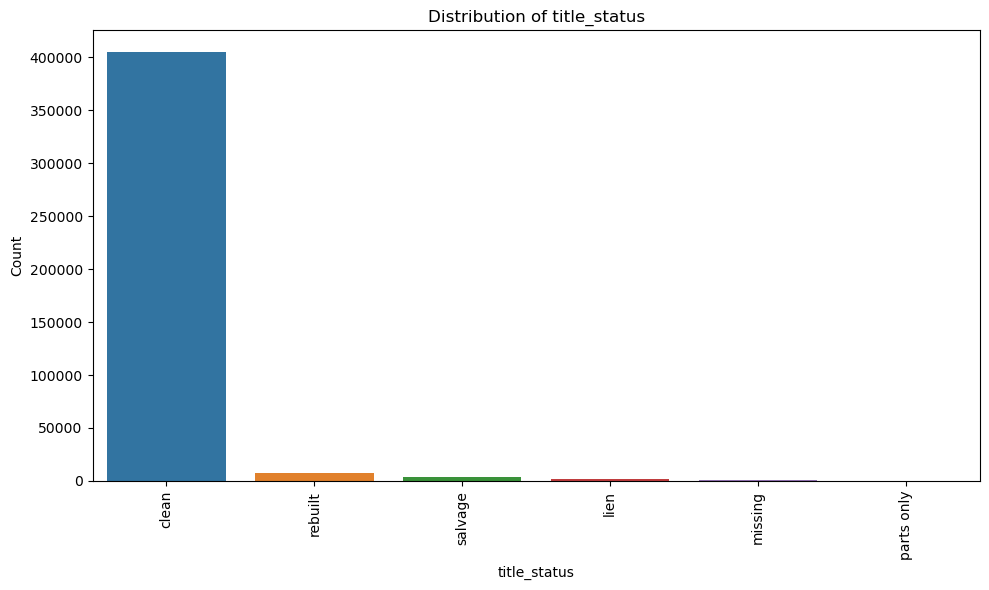

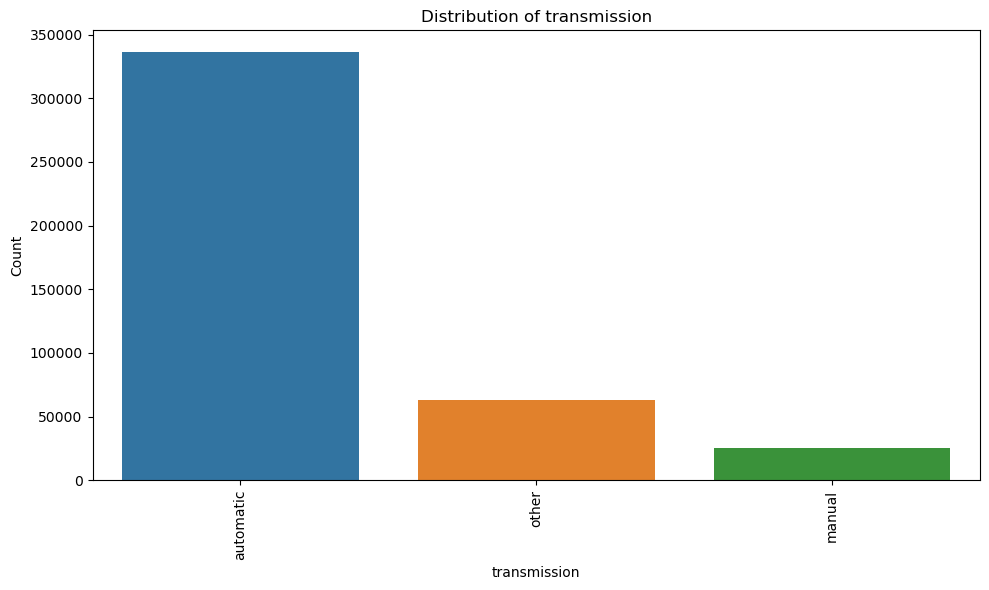

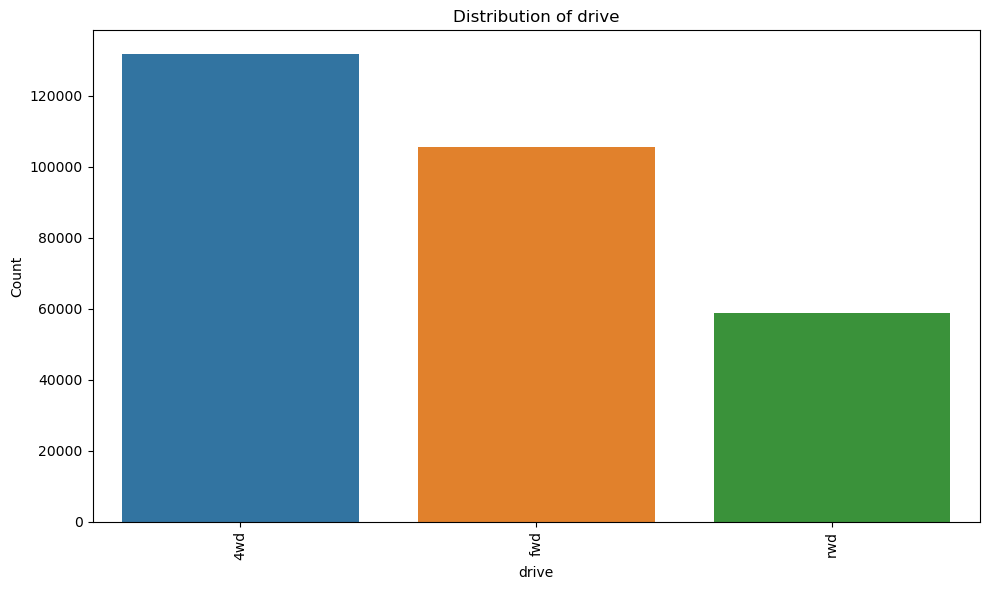

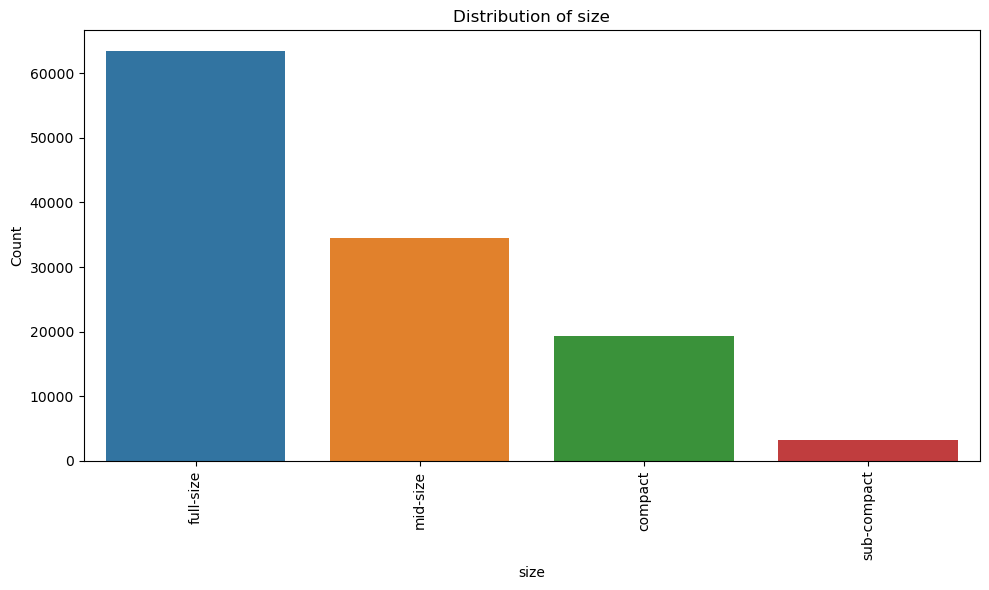

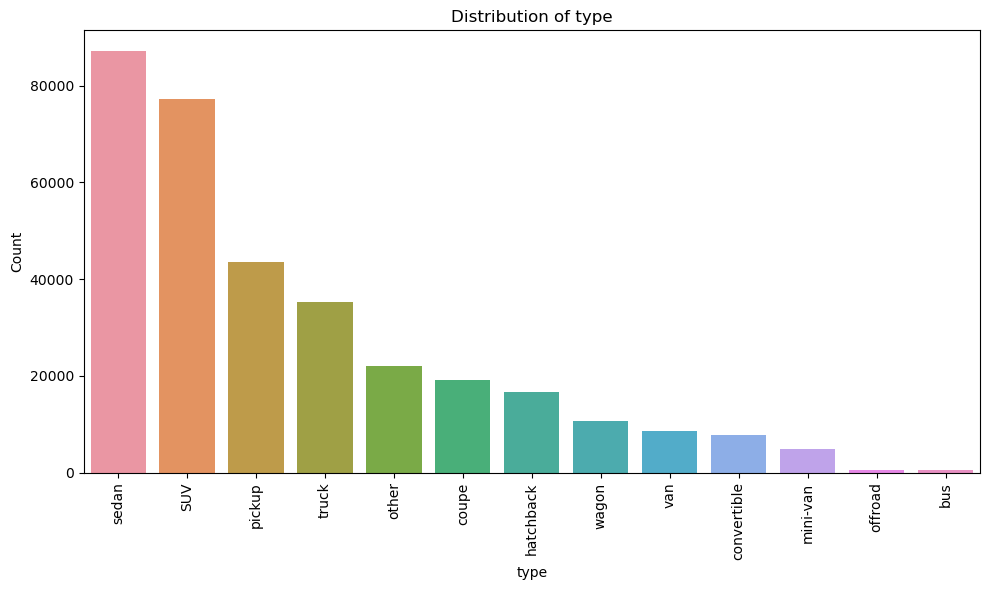

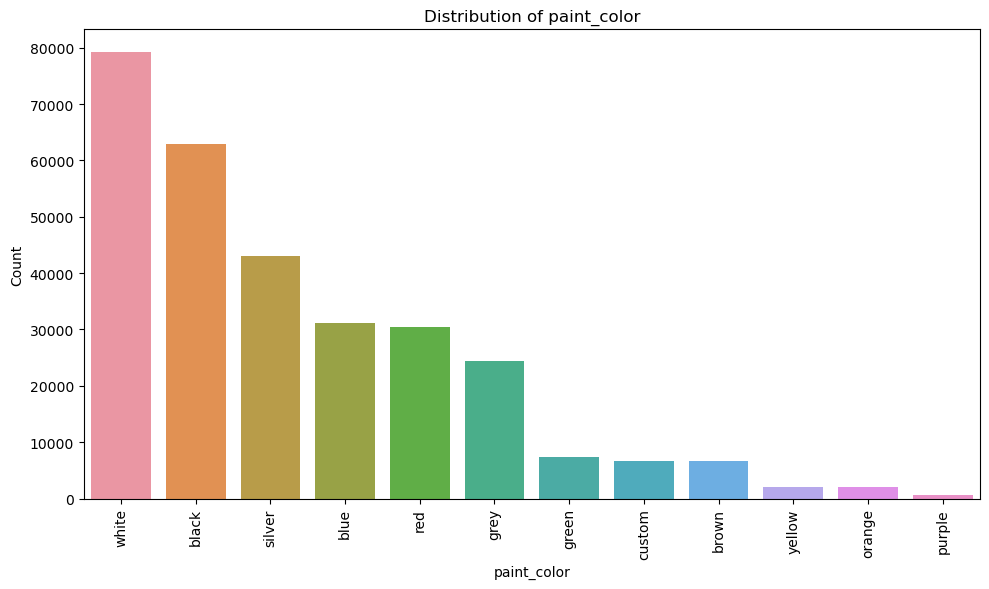

In [14]:
# Select non-numerical columns to explore
non_num_cols = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Loop over non-numerical columns and plot distribution
for col in non_num_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

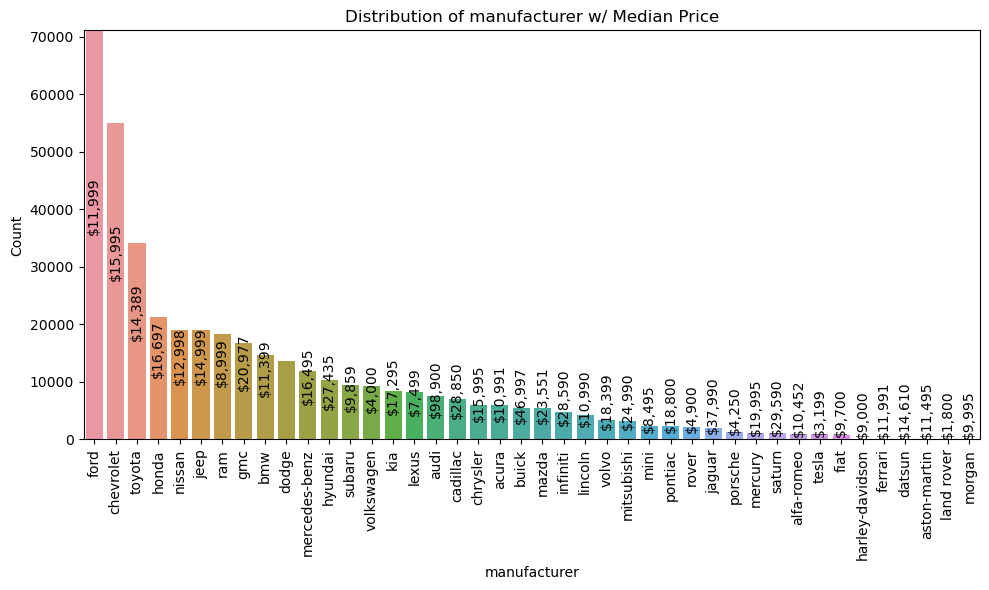

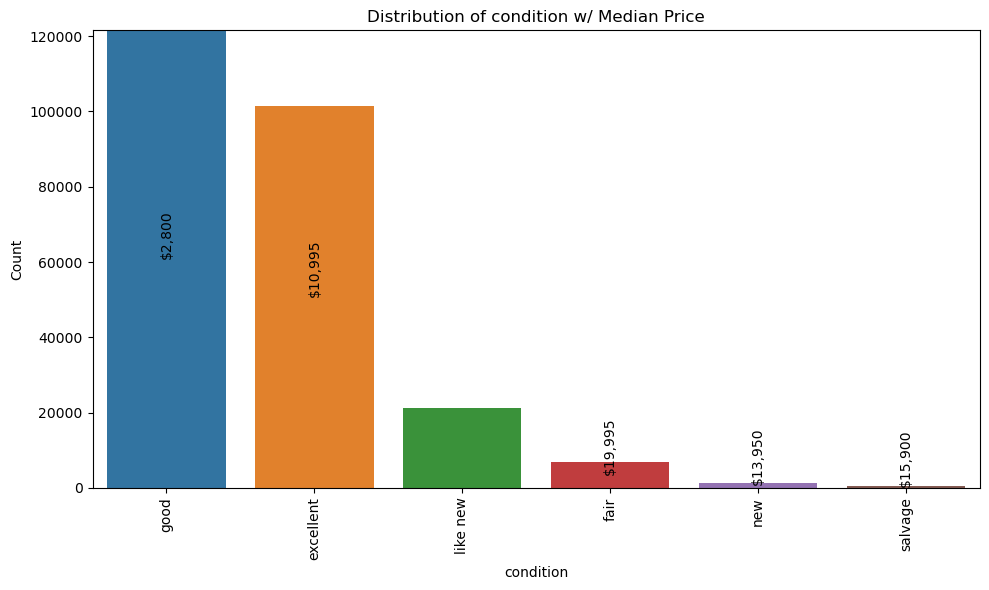

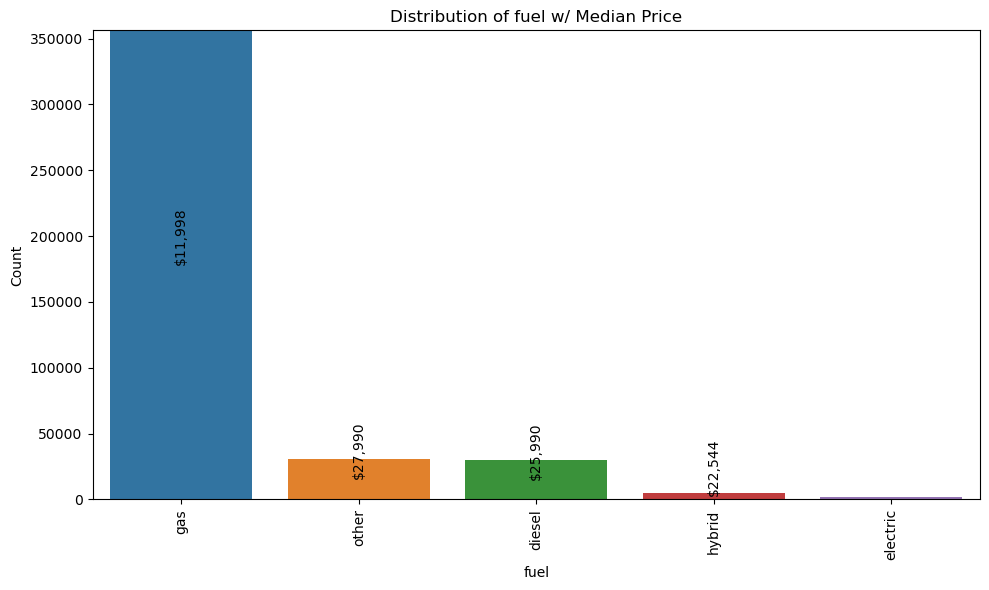

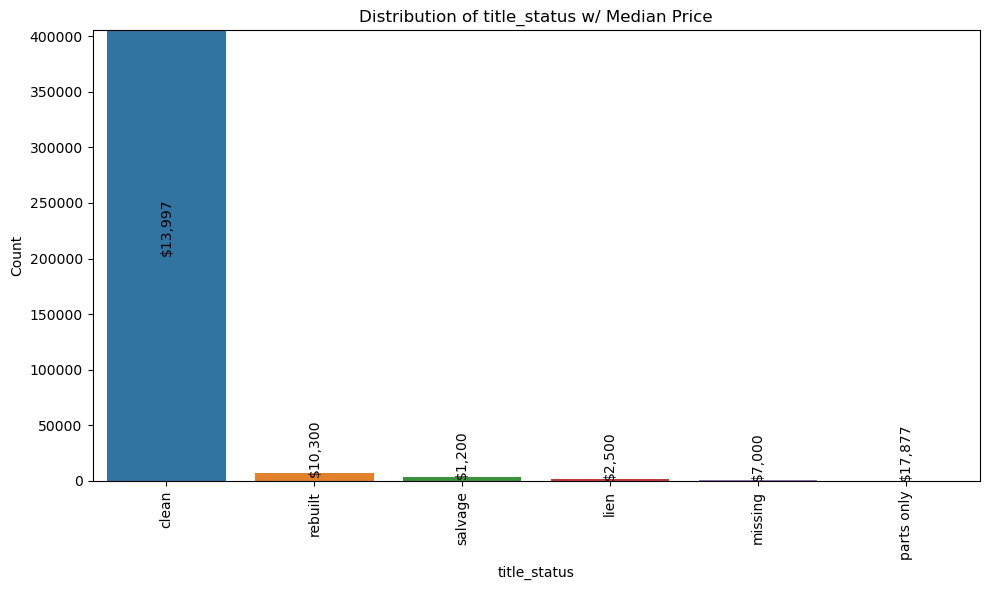

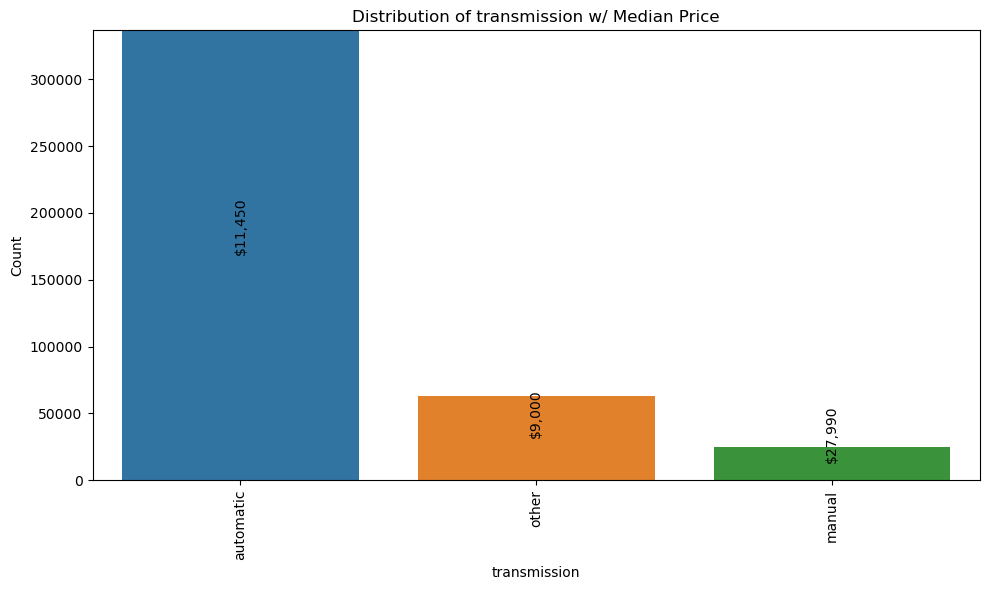

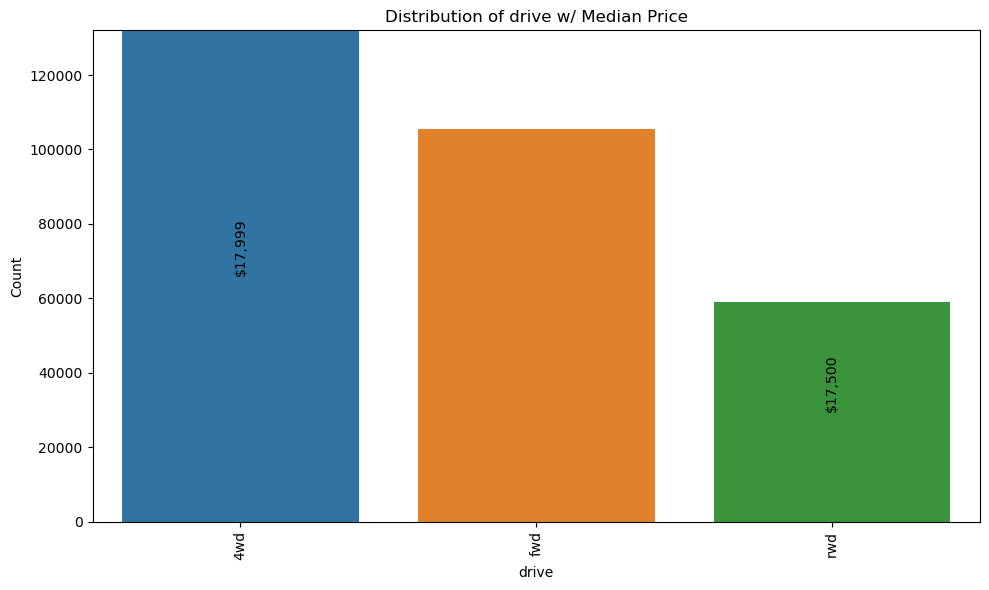

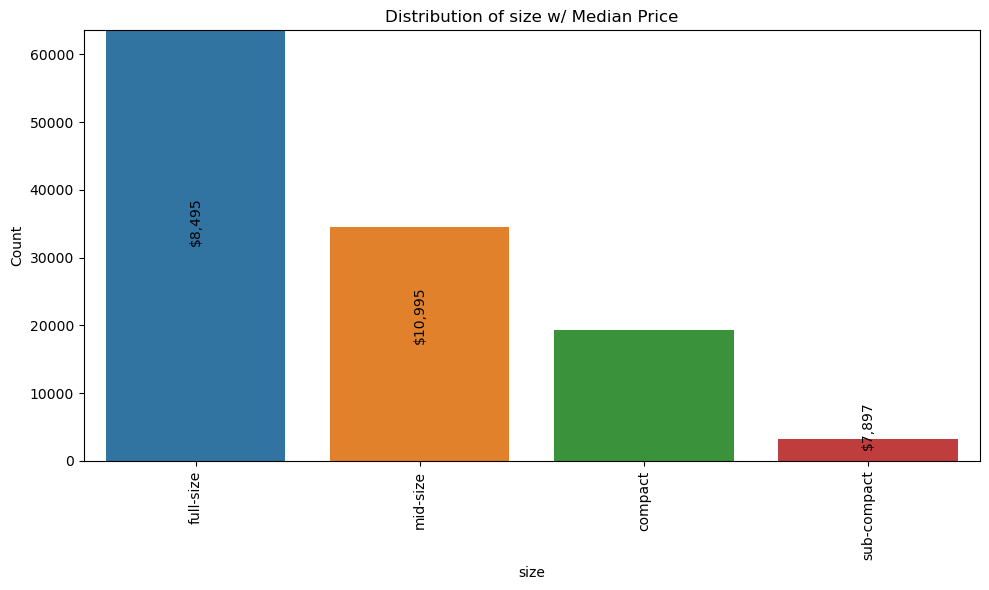

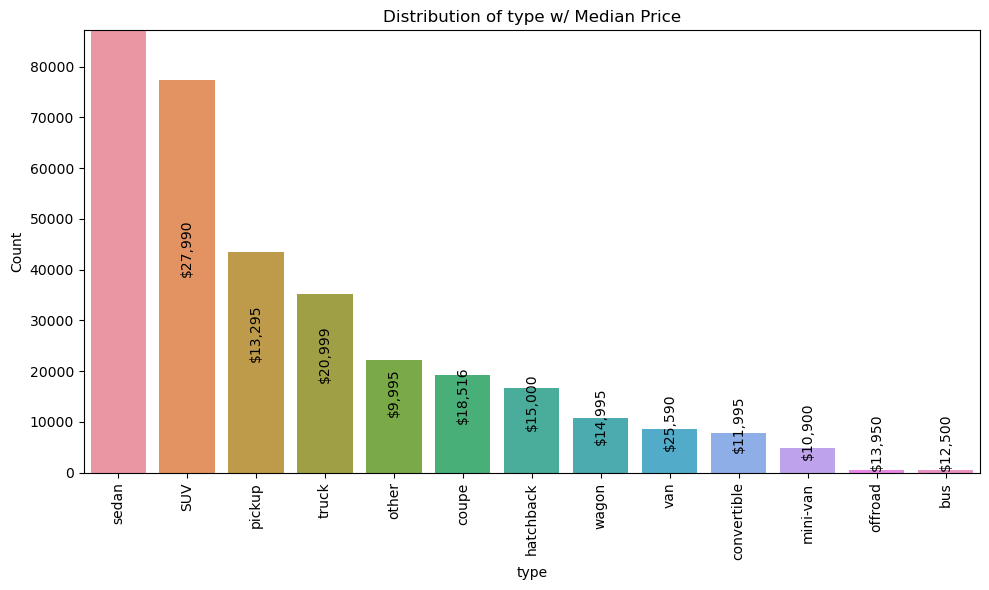

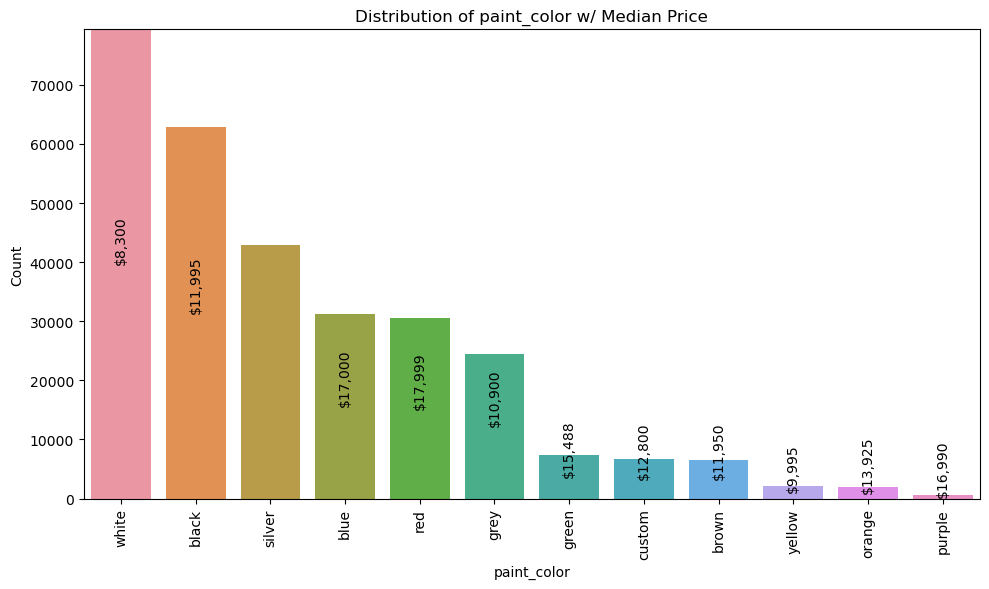

In [15]:
# Select non-numerical columns to explore
non_num_cols = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Loop over non-numerical columns and plot distribution
for col in non_num_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col} w/ Median Price')

    # Compute median prices for each category
    median_prices = []
    for category in df[col].unique():
        median_price = df[df[col] == category]['price'].median()
        median_prices.append(median_price)

    # Add median price labels to plot
    for i, (category, count) in enumerate(zip(df[col].unique(), df[col].value_counts())):
        if not np.isnan(median_prices[i]):
            plt.text(i, count/2, f"${int(median_prices[i]):,}", ha='center', va='bottom',rotation=90)
    
    # Set y-axis limit
    plt.ylim(0, df[col].value_counts().max()+100)
    
    # Adjust bottom margin to avoid bleeding of text into x-axis
    plt.subplots_adjust(bottom=0.2)
    
    plt.tight_layout()
    plt.show()



### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [16]:
# Count the number of missing values in each column
missing_vals = df.isna().sum()

# Print the number of missing values in each column
print(missing_vals)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [17]:
# Dropping VIN because of high NA values and no significant indicator in its intrinsict value.
# Also dropping size.
cols_to_drop = ['VIN','id','region','state', 'model']
df = df.drop(cols_to_drop, axis=1)

In [18]:
# Check for missing values and handle them
print(df.isnull().sum())

# If there are missing values, drop them
df = df.dropna()

# Encode categorical variables
cat_cols = ['manufacturer','drive','size','type','paint_color', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission']
df_encoded = pd.get_dummies(df, columns=cat_cols)

# Normalize numerical variables if necessary
num_cols = ['year', 'odometer', 'price']
df_normalized = (df_encoded[num_cols] - df_encoded[num_cols].mean()) / df_encoded[num_cols].std()

# Create new features if necessary
df_normalized['age'] = 2023 - df_encoded['year']

# Combine normalized numerical features and categorical features
df_final = pd.concat([df_normalized, df_encoded.drop(num_cols, axis=1)], axis=1)

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64


In [19]:
df_final

,year,odometer,price,age,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,fuel_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other
1,-0.126336,0.157065,270.952516,16.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7,-0.899908,0.096941,80.558991,24.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11,-0.029640,-0.057377,9.783496,15.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
13,-1.189998,0.782353,8.945873,27.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
14,-0.899908,-0.115497,8.945873,24.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426716,1.227415,-0.488128,-0.005767,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426719,1.227415,-0.488128,-0.005767,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426750,1.227415,-0.364009,-0.005767,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426754,1.227415,-0.500285,-0.005767,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [20]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

In [21]:
df_encoded.columns

Index(['price', 'year', 'odometer', 'manufacturer_acura',
       'manufacturer_alfa-romeo', 'manufacturer_aston-martin',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac',
       ...
       'fuel_other', 'title_status_clean', 'title_status_lien',
       'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage',
       'transmission_automatic', 'transmission_manual', 'transmission_other'],
      dtype='object', length=104)

In [22]:
print(df_final.columns)

Index(['year', 'odometer', 'price', 'age', 'manufacturer_acura',
       'manufacturer_alfa-romeo', 'manufacturer_aston-martin',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       ...
       'fuel_other', 'title_status_clean', 'title_status_lien',
       'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage',
       'transmission_automatic', 'transmission_manual', 'transmission_other'],
      dtype='object', length=105)


In [23]:
print(df_final.dtypes)

year                      float64
odometer                  float64
price                     float64
age                       float64
manufacturer_acura          uint8
                           ...   
title_status_rebuilt        uint8
title_status_salvage        uint8
transmission_automatic      uint8
transmission_manual         uint8
transmission_other          uint8
Length: 105, dtype: object


In [24]:
non_numeric_cols = df_final.select_dtypes(exclude=['uint8', 'float64', 'int64']).columns

if len(non_numeric_cols) > 0:
    print(f"The following columns are not of uint8, float64, or int64 data type: {non_numeric_cols}")
else:
    print("All columns are of uint8, float64, or int64 data type.")

All columns are of uint8, float64, or int64 data type.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [25]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('price', axis=1), df_final['price'], test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
# Linear Regression
print("Linear Regression:")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f"Root Mean Squared Error: {rmse_lr:.2f}")

Linear Regression:
Root Mean Squared Error: 0.07


In [27]:
# Get the coefficients of the model
coef_lr = model_lr.coef_

# Get the names of the features
feature_names_lr = X_train.columns

# Create a DataFrame with the feature names and coefficients
coefficients_lr = pd.DataFrame({'Feature': feature_names_lr, 'Coefficient': coef_lr})

# Sort the DataFrame by the absolute value of the coefficients in descending order
coefficients_sorted_lr = coefficients_lr.iloc[abs(coefficients_lr['Coefficient']).argsort()[::-1]]

# Print the top 60 features and their coefficients
for i in range(60):
    print(f"{coefficients_sorted_lr.iloc[i]['Feature']}: {coefficients_sorted_lr.iloc[i]['Coefficient']:.8f}")

type_pickup: 0.07015891
manufacturer_toyota: 0.05316132
manufacturer_harley-davidson: -0.04450483
manufacturer_ram: -0.03651600
paint_color_silver: 0.03166884
manufacturer_gmc: -0.02304385
fuel_hybrid: -0.01908567
manufacturer_chevrolet: -0.01877312
cylinders_8 cylinders: 0.01846035
type_mini-van: -0.01457243
manufacturer_fiat: 0.01358404
manufacturer_alfa-romeo: 0.01244635
fuel_diesel: 0.01218724
manufacturer_ford: -0.01130960
type_offroad: -0.01121956
cylinders_5 cylinders: -0.00994865
manufacturer_mini: 0.00980704
manufacturer_lincoln: -0.00952107
manufacturer_cadillac: -0.00899964
paint_color_green: -0.00852521
type_SUV: -0.00840611
manufacturer_saturn: 0.00814901
type_sedan: -0.00802037
title_status_parts only: -0.00780482
manufacturer_datsun: 0.00756340
manufacturer_mazda: 0.00749386
manufacturer_tesla: 0.00748667
type_hatchback: -0.00734168
type_wagon: -0.00732121
cylinders_4 cylinders: -0.00730382
manufacturer_mitsubishi: 0.00722835
manufacturer_kia: 0.00700349
paint_color_brow

In [28]:
# Ridge Regression
print("\nRidge Regression:")

# Define a list of alpha values to try
alphas = [0.0001,0.001,0.01, 0.1, 1, 10, 100,1000,10000, 100000]

# Initialize a dictionary to store the results
results = {}

# Iterate over the alpha values
for alpha in alphas:
    
    # Train the model on the training set
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)

    # Use the model to make predictions on the testing set
    y_pred_ridge = model_ridge.predict(X_test)

    # Evaluate the model's performance on the testing set
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    
    # Store the results in the dictionary
    results[alpha] = rmse_ridge
    
    # Print the results for the current alpha value
    print(f"Root Mean Squared Error: {rmse_ridge:.2f} with alpha={alpha}")

# Find the alpha value with the lowest RMSE
best_alpha = min(results, key=results.get)
print(f"Best alpha: {best_alpha} with RMSE={results[best_alpha]:.2f}")


Ridge Regression:
Root Mean Squared Error: 0.07 with alpha=0.0001
Root Mean Squared Error: 0.07 with alpha=0.001
Root Mean Squared Error: 0.07 with alpha=0.01
Root Mean Squared Error: 0.07 with alpha=0.1
Root Mean Squared Error: 0.07 with alpha=1
Root Mean Squared Error: 0.07 with alpha=10
Root Mean Squared Error: 0.07 with alpha=100
Root Mean Squared Error: 0.06 with alpha=1000
Root Mean Squared Error: 0.06 with alpha=10000
Root Mean Squared Error: 0.06 with alpha=100000
Best alpha: 100000 with RMSE=0.06


In [29]:
# Get the coefficients of the model
coef_r = model_ridge.coef_

# Get the names of the features
feature_names_r = X_train.columns

# Create a DataFrame with the feature names and coefficients
coefficients_r = pd.DataFrame({'Feature': feature_names_r, 'Coefficient': coef_r})

# Sort the DataFrame by the absolute value of the coefficients in descending order
coefficients_sorted_r = coefficients_r.iloc[abs(coefficients_r['Coefficient']).argsort()[::-1]]

# Print the top 60 features and their coefficients
for i in range(60):
    print(f"{coefficients_sorted_r.iloc[i]['Feature']}: {coefficients_sorted_r.iloc[i]['Coefficient']:.8f}")

type_pickup: 0.00303850
manufacturer_toyota: 0.00230892
paint_color_silver: 0.00205750
cylinders_8 cylinders: 0.00202629
size_full-size: 0.00120583
drive_4wd: 0.00110865
cylinders_6 cylinders: -0.00107762
drive_fwd: -0.00090735
type_SUV: -0.00086431
cylinders_4 cylinders: -0.00085882
size_mid-size: -0.00079303
type_sedan: -0.00078613
condition_excellent: 0.00077581
type_truck: -0.00062106
manufacturer_chevrolet: -0.00059780
fuel_diesel: 0.00047178
paint_color_black: -0.00044977
fuel_gas: -0.00042018
paint_color_red: -0.00038306
paint_color_blue: -0.00037728
condition_good: -0.00035981
size_compact: -0.00035975
transmission_automatic: 0.00033077
transmission_manual: -0.00028908
condition_like new: -0.00027795
paint_color_grey: -0.00027665
odometer: 0.00022231
type_coupe: -0.00021271
drive_rwd: -0.00020130
title_status_clean: 0.00017540
manufacturer_ram: -0.00016978
manufacturer_honda: -0.00016019
age: 0.00015615
paint_color_green: -0.00014710
manufacturer_jeep: -0.00013198
paint_color_b

In [30]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest
print("\nRandom Forest:")
model_rf = RandomForestRegressor(n_estimators=300,max_depth=10,min_samples_leaf=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Root Mean Squared Error: {rmse_rf:.8f} with n_estimators=300,max_depth=10,min_samples_leaf=5")


Random Forest:
Root Mean Squared Error: 0.50809515 with n_estimators=300,max_depth=10,min_samples_leaf=5


In [31]:
# Random Forest Feature Importances
importances_rf = model_rf.feature_importances_
feature_names_rf = X_train.columns
feature_importances_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances_rf})
feature_importances_sorted_rf = feature_importances_rf.sort_values('Importance', ascending=False)
# Print the top 60 features and their importances
for i in range(60):
    print(f"{feature_importances_sorted_rf.iloc[i]['Feature']}: {feature_importances_sorted_rf.iloc[i]['Importance']:.8f}")

cylinders_8 cylinders: 0.36127825
odometer: 0.29293117
paint_color_silver: 0.09446858
age: 0.05022035
year: 0.04006428
drive_rwd: 0.02526639
condition_good: 0.02382412
type_pickup: 0.02195507
condition_like new: 0.01904134
manufacturer_toyota: 0.01620589
paint_color_grey: 0.01619019
paint_color_white: 0.01131227
fuel_diesel: 0.00814523
manufacturer_chevrolet: 0.00610090
type_truck: 0.00276564
fuel_gas: 0.00249212
condition_excellent: 0.00205055
size_full-size: 0.00194732
manufacturer_nissan: 0.00101997
size_mid-size: 0.00089301
title_status_rebuilt: 0.00062753
paint_color_black: 0.00028313
drive_4wd: 0.00024826
manufacturer_ford: 0.00017659
manufacturer_gmc: 0.00013620
type_SUV: 0.00011365
cylinders_6 cylinders: 0.00010039
drive_fwd: 0.00003340
manufacturer_ram: 0.00001911
condition_fair: 0.00001829
size_compact: 0.00001509
cylinders_4 cylinders: 0.00001265
paint_color_blue: 0.00000693
transmission_manual: 0.00000670
manufacturer_jeep: 0.00000427
transmission_other: 0.00000385
manufact

In [32]:
from xgboost import XGBRegressor

# Define the XGBRegressor model
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
model_xgb.fit(X_train, y_train)

# Use the model to make predictions on the testing set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model's performance on the testing set
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"Root Mean Squared Error: {rmse_xgb:.2f}")

# Get the feature importances
importances_xgb = model_xgb.feature_importances_

# Get the feature names
feature_names_xgb = X_train.columns

# Create a DataFrame with the feature names and importances
feature_importances_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': importances_xgb})

# Sort the DataFrame by the importances in descending order
feature_importances_sorted_xgb = feature_importances_xgb.sort_values('Importance', ascending=False)

# Print the top 60 features and their importances
for i in range(60):
    print(f"{feature_importances_sorted_xgb.iloc[i]['Feature']}: {feature_importances_sorted_xgb.iloc[i]['Importance']:.8f}")

Root Mean Squared Error: 1.74
odometer: 0.47785184
cylinders_8 cylinders: 0.31602114
paint_color_silver: 0.17120165
manufacturer_toyota: 0.02450825
fuel_diesel: 0.00474358
type_pickup: 0.00380863
year: 0.00064481
paint_color_grey: 0.00040027
manufacturer_nissan: 0.00029457
condition_like new: 0.00024041
manufacturer_ram: 0.00011304
condition_good: 0.00007183
paint_color_black: 0.00006235
manufacturer_chevrolet: 0.00002091
manufacturer_gmc: 0.00000846
title_status_rebuilt: 0.00000292
type_truck: 0.00000097
cylinders_6 cylinders: 0.00000061
paint_color_custom: 0.00000049
manufacturer_jeep: 0.00000027
type_bus: 0.00000021
drive_fwd: 0.00000020
cylinders_5 cylinders: 0.00000019
fuel_gas: 0.00000017
size_full-size: 0.00000017
drive_4wd: 0.00000013
paint_color_orange: 0.00000013
cylinders_3 cylinders: 0.00000013
transmission_automatic: 0.00000013
cylinders_4 cylinders: 0.00000011
transmission_other: 0.00000011
manufacturer_porsche: 0.00000010
manufacturer_jaguar: 0.00000010
type_sedan: 0.000

In [33]:
# Linear Regression top 60 features and their coefficients
for i in range(60):
    print(f"{coefficients_sorted_lr.iloc[i]['Feature']}: {coefficients_sorted_lr.iloc[i]['Coefficient']:.8f}")

type_pickup: 0.07015891
manufacturer_toyota: 0.05316132
manufacturer_harley-davidson: -0.04450483
manufacturer_ram: -0.03651600
paint_color_silver: 0.03166884
manufacturer_gmc: -0.02304385
fuel_hybrid: -0.01908567
manufacturer_chevrolet: -0.01877312
cylinders_8 cylinders: 0.01846035
type_mini-van: -0.01457243
manufacturer_fiat: 0.01358404
manufacturer_alfa-romeo: 0.01244635
fuel_diesel: 0.01218724
manufacturer_ford: -0.01130960
type_offroad: -0.01121956
cylinders_5 cylinders: -0.00994865
manufacturer_mini: 0.00980704
manufacturer_lincoln: -0.00952107
manufacturer_cadillac: -0.00899964
paint_color_green: -0.00852521
type_SUV: -0.00840611
manufacturer_saturn: 0.00814901
type_sedan: -0.00802037
title_status_parts only: -0.00780482
manufacturer_datsun: 0.00756340
manufacturer_mazda: 0.00749386
manufacturer_tesla: 0.00748667
type_hatchback: -0.00734168
type_wagon: -0.00732121
cylinders_4 cylinders: -0.00730382
manufacturer_mitsubishi: 0.00722835
manufacturer_kia: 0.00700349
paint_color_brow

In [34]:
# Ridge top 60 features and their coefficients
for i in range(60):
    print(f"{coefficients_sorted_r.iloc[i]['Feature']}: {coefficients_sorted_r.iloc[i]['Coefficient']:.8f}")

type_pickup: 0.00303850
manufacturer_toyota: 0.00230892
paint_color_silver: 0.00205750
cylinders_8 cylinders: 0.00202629
size_full-size: 0.00120583
drive_4wd: 0.00110865
cylinders_6 cylinders: -0.00107762
drive_fwd: -0.00090735
type_SUV: -0.00086431
cylinders_4 cylinders: -0.00085882
size_mid-size: -0.00079303
type_sedan: -0.00078613
condition_excellent: 0.00077581
type_truck: -0.00062106
manufacturer_chevrolet: -0.00059780
fuel_diesel: 0.00047178
paint_color_black: -0.00044977
fuel_gas: -0.00042018
paint_color_red: -0.00038306
paint_color_blue: -0.00037728
condition_good: -0.00035981
size_compact: -0.00035975
transmission_automatic: 0.00033077
transmission_manual: -0.00028908
condition_like new: -0.00027795
paint_color_grey: -0.00027665
odometer: 0.00022231
type_coupe: -0.00021271
drive_rwd: -0.00020130
title_status_clean: 0.00017540
manufacturer_ram: -0.00016978
manufacturer_honda: -0.00016019
age: 0.00015615
paint_color_green: -0.00014710
manufacturer_jeep: -0.00013198
paint_color_b

In [35]:
# Print the top 60 features and their importances
for i in range(60):
    print(f"{feature_importances_sorted_rf.iloc[i]['Feature']}: {feature_importances_sorted_rf.iloc[i]['Importance']:.8f}")

cylinders_8 cylinders: 0.36127825
odometer: 0.29293117
paint_color_silver: 0.09446858
age: 0.05022035
year: 0.04006428
drive_rwd: 0.02526639
condition_good: 0.02382412
type_pickup: 0.02195507
condition_like new: 0.01904134
manufacturer_toyota: 0.01620589
paint_color_grey: 0.01619019
paint_color_white: 0.01131227
fuel_diesel: 0.00814523
manufacturer_chevrolet: 0.00610090
type_truck: 0.00276564
fuel_gas: 0.00249212
condition_excellent: 0.00205055
size_full-size: 0.00194732
manufacturer_nissan: 0.00101997
size_mid-size: 0.00089301
title_status_rebuilt: 0.00062753
paint_color_black: 0.00028313
drive_4wd: 0.00024826
manufacturer_ford: 0.00017659
manufacturer_gmc: 0.00013620
type_SUV: 0.00011365
cylinders_6 cylinders: 0.00010039
drive_fwd: 0.00003340
manufacturer_ram: 0.00001911
condition_fair: 0.00001829
size_compact: 0.00001509
cylinders_4 cylinders: 0.00001265
paint_color_blue: 0.00000693
transmission_manual: 0.00000670
manufacturer_jeep: 0.00000427
transmission_other: 0.00000385
manufact

In [36]:
# XGBoost the top 60 features and their importances
for i in range(60):
    print(f"{feature_importances_sorted_xgb.iloc[i]['Feature']}: {feature_importances_sorted_xgb.iloc[i]['Importance']:.8f}")

odometer: 0.47785184
cylinders_8 cylinders: 0.31602114
paint_color_silver: 0.17120165
manufacturer_toyota: 0.02450825
fuel_diesel: 0.00474358
type_pickup: 0.00380863
year: 0.00064481
paint_color_grey: 0.00040027
manufacturer_nissan: 0.00029457
condition_like new: 0.00024041
manufacturer_ram: 0.00011304
condition_good: 0.00007183
paint_color_black: 0.00006235
manufacturer_chevrolet: 0.00002091
manufacturer_gmc: 0.00000846
title_status_rebuilt: 0.00000292
type_truck: 0.00000097
cylinders_6 cylinders: 0.00000061
paint_color_custom: 0.00000049
manufacturer_jeep: 0.00000027
type_bus: 0.00000021
drive_fwd: 0.00000020
cylinders_5 cylinders: 0.00000019
fuel_gas: 0.00000017
size_full-size: 0.00000017
drive_4wd: 0.00000013
paint_color_orange: 0.00000013
cylinders_3 cylinders: 0.00000013
transmission_automatic: 0.00000013
cylinders_4 cylinders: 0.00000011
transmission_other: 0.00000011
manufacturer_porsche: 0.00000010
manufacturer_jaguar: 0.00000010
type_sedan: 0.00000008
type_coupe: 0.00000007
d

In [37]:
# create dataframes for each model's feature importance/coefficients
lr_df = coefficients_sorted_lr
ridge_df = coefficients_sorted_r
rf_df = feature_importances_sorted_rf
xgb_df = feature_importances_sorted_xgb

# merge the dataframes on feature
merged_df = pd.merge(lr_df, ridge_df, on='Feature', how='outer')
merged_df = pd.merge(merged_df, rf_df, on='Feature', how='outer')
merged_df = pd.merge(merged_df, xgb_df, on='Feature', how='outer')

# rename columns
merged_df.columns = ['Feature', 'LR Coefficient', 'Ridge Coefficient', 'RF Importance', 'XGB Importance']

# sort by feature name
merged_df = merged_df.sort_values(by='Feature')

# reset index
merged_df = merged_df.reset_index(drop=True)

# display the final dataframe
print(merged_df)

                 Feature  LR Coefficient  Ridge Coefficient  RF Importance  \
0                    age        0.000061           0.000156   5.022035e-02   
1    condition_excellent        0.005188           0.000776   2.050552e-03   
2         condition_fair       -0.004409          -0.000106   1.828716e-05   
3         condition_good        0.001644          -0.000360   2.382412e-02   
4     condition_like new        0.000860          -0.000278   1.904134e-02   
..                   ...             ...                ...            ...   
99            type_sedan       -0.008020          -0.000786   1.099923e-06   
100           type_truck       -0.005638          -0.000621   2.765641e-03   
101             type_van        0.001113          -0.000120   4.937460e-07   
102           type_wagon       -0.007321          -0.000077   2.248157e-07   
103                 year       -0.000006          -0.000015   4.006428e-02   

     XGB Importance  
0      0.000000e+00  
1      3.008937e-08

In [38]:
merged_df = merged_df.sort_values('XGB Importance', ascending=False)
merged_df.head(60)

,Feature,LR Coefficient,Ridge Coefficient,RF Importance,XGB Importance
64,odometer,0.000005,2.223086e-04,2.929312e-01,4.778518e-01
13,cylinders_8 cylinders,0.018460,2.026286e-03,3.612783e-01,3.160211e-01
74,paint_color_silver,0.031669,2.057495e-03,9.446858e-02,1.712016e-01
61,manufacturer_toyota,0.053161,2.308919e-03,1.620589e-02,2.450825e-02
18,fuel_diesel,0.012187,4.717834e-04,8.145233e-03,4.743582e-03
98,type_pickup,0.070159,3.038504e-03,2.195507e-02,3.808630e-03
103,year,-0.000006,-1.509947e-05,4.006428e-02,6.448133e-04
70,paint_color_grey,-0.001444,-2.766543e-04,1.619019e-02,4.002664e-04
53,manufacturer_nissan,0.002991,-4.403776e-05,1.019965e-03,2.945726e-04
4,condition_like new,0.000860,-2.779474e-04,1.904134e-02,2.404093e-04


In [39]:
# assign rank to XGB Importance column
merged_df['XGB Rank'] = merged_df['XGB Importance'].rank(method='dense', ascending=False)

# assign rank to LR Coefficient column
merged_df['LR Rank'] = merged_df['LR Coefficient'].rank(method='dense', ascending=False)

# assign rank to Ridge Coefficient column
merged_df['Ridge Rank'] = merged_df['Ridge Coefficient'].rank(method='dense', ascending=False)

# assign rank to RF Importance column
merged_df['RF Rank'] = merged_df['RF Importance'].rank(method='dense', ascending=False)

In [40]:
merged_df

,Feature,LR Coefficient,Ridge Coefficient,RF Importance,XGB Importance,XGB Rank,LR Rank,Ridge Rank,RF Rank
64,odometer,0.000005,2.223086e-04,2.929312e-01,0.477852,1.0,51.0,10.0,2.0
13,cylinders_8 cylinders,0.018460,2.026286e-03,3.612783e-01,0.316021,2.0,4.0,4.0,1.0
74,paint_color_silver,0.031669,2.057495e-03,9.446858e-02,0.171202,3.0,3.0,3.0,3.0
61,manufacturer_toyota,0.053161,2.308919e-03,1.620589e-02,0.024508,4.0,2.0,2.0,10.0
18,fuel_diesel,0.012187,4.717834e-04,8.145233e-03,0.004744,5.0,7.0,8.0,13.0
...,...,...,...,...,...,...,...,...,...
41,manufacturer_infiniti,0.000923,-2.781103e-05,9.275078e-09,0.000000,84.0,45.0,44.0,80.0
45,manufacturer_land rover,-0.002850,-3.685104e-07,0.000000e+00,0.000000,84.0,68.0,14.0,99.0
58,manufacturer_saturn,0.008149,-1.246101e-05,2.242361e-10,0.000000,84.0,9.0,31.0,92.0
48,manufacturer_mazda,0.007494,-3.035662e-05,5.161619e-08,0.000000,84.0,11.0,47.0,70.0


In [41]:
merged_df.drop(['LR Coefficient', 'Ridge Coefficient', 'RF Importance', 'XGB Importance'], axis=1, inplace=True)


In [42]:
merged_df

,Feature,XGB Rank,LR Rank,Ridge Rank,RF Rank
64,odometer,1.0,51.0,10.0,2.0
13,cylinders_8 cylinders,2.0,4.0,4.0,1.0
74,paint_color_silver,3.0,3.0,3.0,3.0
61,manufacturer_toyota,4.0,2.0,2.0,10.0
18,fuel_diesel,5.0,7.0,8.0,13.0
...,...,...,...,...,...
41,manufacturer_infiniti,84.0,45.0,44.0,80.0
45,manufacturer_land rover,84.0,68.0,14.0,99.0
58,manufacturer_saturn,84.0,9.0,31.0,92.0
48,manufacturer_mazda,84.0,11.0,47.0,70.0


In [43]:
# add up the rank columns for each feature
merged_df['Rank Total'] = merged_df.iloc[:, 1:].sum(axis=1)

# sort the dataframe by Rank Total
merged_df_ranked = merged_df.sort_values(by='Rank Total')

merged_df_ranked

,Feature,XGB Rank,LR Rank,Ridge Rank,RF Rank,Rank Total
13,cylinders_8 cylinders,2.0,4.0,4.0,1.0,11.0
74,paint_color_silver,3.0,3.0,3.0,3.0,12.0
98,type_pickup,6.0,1.0,1.0,8.0,16.0
61,manufacturer_toyota,4.0,2.0,2.0,10.0,18.0
18,fuel_diesel,5.0,7.0,8.0,13.0,33.0
...,...,...,...,...,...,...
38,manufacturer_harley-davidson,84.0,104.0,19.0,94.0,301.0
29,manufacturer_cadillac,84.0,94.0,66.0,59.0,303.0
21,fuel_hybrid,84.0,101.0,57.0,65.0,307.0
69,paint_color_green,84.0,93.0,83.0,54.0,314.0


In [44]:
merged_df_ranked.head(60)

,Feature,XGB Rank,LR Rank,Ridge Rank,RF Rank,Rank Total
13,cylinders_8 cylinders,2.0,4.0,4.0,1.0,11.0
74,paint_color_silver,3.0,3.0,3.0,3.0,12.0
98,type_pickup,6.0,1.0,1.0,8.0,16.0
61,manufacturer_toyota,4.0,2.0,2.0,10.0,18.0
18,fuel_diesel,5.0,7.0,8.0,13.0,33.0
64,odometer,1.0,51.0,10.0,2.0,64.0
78,size_full-size,25.0,35.0,5.0,18.0,83.0
15,drive_4wd,26.0,36.0,6.0,23.0,91.0
1,condition_excellent,48.0,20.0,7.0,17.0,92.0
103,year,7.0,52.0,35.0,5.0,99.0


In [45]:
correlation_matrix = merged_df_ranked.corr()
correlation_matrix

,XGB Rank,LR Rank,Ridge Rank,RF Rank,Rank Total
XGB Rank,1.000000,0.045340,-0.087601,0.685344,0.674713
LR Rank,0.045340,1.000000,0.410221,0.006016,0.636293
Ridge Rank,-0.087601,0.410221,1.000000,-0.278400,0.460400
RF Rank,0.685344,0.006016,-0.278400,1.000000,0.585866
Rank Total,0.674713,0.636293,0.460400,0.585866,1.000000


In [46]:
correlation_matrix_sorted = correlation_matrix.unstack().sort_values(ascending=False)
correlation_matrix_sorted

XGB Rank    XGB Rank      1.000000
LR Rank     LR Rank       1.000000
RF Rank     RF Rank       1.000000
Ridge Rank  Ridge Rank    1.000000
Rank Total  Rank Total    1.000000
RF Rank     XGB Rank      0.685344
XGB Rank    RF Rank       0.685344
Rank Total  XGB Rank      0.674713
XGB Rank    Rank Total    0.674713
LR Rank     Rank Total    0.636293
Rank Total  LR Rank       0.636293
RF Rank     Rank Total    0.585866
Rank Total  RF Rank       0.585866
            Ridge Rank    0.460400
Ridge Rank  Rank Total    0.460400
            LR Rank       0.410221
LR Rank     Ridge Rank    0.410221
XGB Rank    LR Rank       0.045340
LR Rank     XGB Rank      0.045340
            RF Rank       0.006016
RF Rank     LR Rank       0.006016
Ridge Rank  XGB Rank     -0.087601
XGB Rank    Ridge Rank   -0.087601
Ridge Rank  RF Rank      -0.278400
RF Rank     Ridge Rank   -0.278400
dtype: float64

<AxesSubplot:>

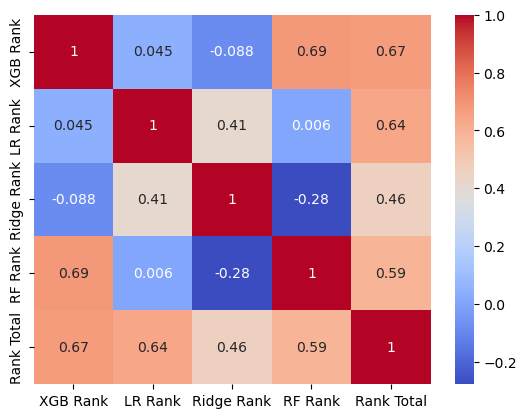

In [47]:
# compute the correlation matrix
corr = merged_df_ranked.corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

It appears that XGB has the highest correlation to the rank total, then Linear Regression, then Random Forest, and then Ridge Rank. However what is interesting is that Linear Regression has almost 0 correlation with XGB. The strongest correlation is between Random Forest and XGB. And between Random Forest, and Total; and XGB, and Total. I'm going to see what I get with just XGB, and Random Forest.

In [48]:
merged_df_ranked = merged_df_ranked.drop(['LR Rank', 'Ridge Rank', 'Rank Total'], axis=1)


In [49]:
merged_df_ranked

,Feature,XGB Rank,RF Rank
13,cylinders_8 cylinders,2.0,1.0
74,paint_color_silver,3.0,3.0
98,type_pickup,6.0,8.0
61,manufacturer_toyota,4.0,10.0
18,fuel_diesel,5.0,13.0
...,...,...,...
38,manufacturer_harley-davidson,84.0,94.0
29,manufacturer_cadillac,84.0,59.0
21,fuel_hybrid,84.0,65.0
69,paint_color_green,84.0,54.0


In [50]:
merged_df_ranked['Final Rank'] = merged_df_ranked['XGB Rank'] + merged_df_ranked['RF Rank']
merged_df_ranked = merged_df_ranked.sort_values(by='Final Rank')
merged_df_ranked

,Feature,XGB Rank,RF Rank,Final Rank
13,cylinders_8 cylinders,2.0,1.0,3.0
64,odometer,1.0,2.0,3.0
74,paint_color_silver,3.0,3.0,6.0
103,year,7.0,5.0,12.0
98,type_pickup,6.0,8.0,14.0
...,...,...,...,...
84,title_status_parts only,84.0,99.0,183.0
24,manufacturer_alfa-romeo,84.0,99.0,183.0
22,fuel_other,84.0,99.0,183.0
32,manufacturer_datsun,84.0,99.0,183.0


In [51]:
merged_df_ranked.head(60)

,Feature,XGB Rank,RF Rank,Final Rank
13,cylinders_8 cylinders,2.0,1.0,3.0
64,odometer,1.0,2.0,3.0
74,paint_color_silver,3.0,3.0,6.0
103,year,7.0,5.0,12.0
98,type_pickup,6.0,8.0,14.0
61,manufacturer_toyota,4.0,10.0,14.0
18,fuel_diesel,5.0,13.0,18.0
70,paint_color_grey,8.0,11.0,19.0
3,condition_good,12.0,7.0,19.0
4,condition_like new,10.0,9.0,19.0


In [52]:
merged_df_ranked.tail(60)

,Feature,XGB Rank,RF Rank,Final Rank
7,cylinders_10 cylinders,54.0,39.0,93.0
90,type_SUV,68.0,26.0,94.0
81,title_status_clean,44.0,51.0,95.0
71,paint_color_orange,27.0,69.0,96.0
101,type_van,47.0,49.0,96.0
79,size_mid-size,77.0,20.0,97.0
36,manufacturer_ford,75.0,24.0,99.0
88,transmission_manual,72.0,34.0,106.0
46,manufacturer_lexus,45.0,63.0,108.0
94,type_hatchback,55.0,55.0,110.0


In [53]:
merged_df_ranked.shape[0]

104

In [54]:
Lowest_possible_rank = merged_df_ranked.shape[0]*2

In [55]:
Lowest_possible_rank

208

In [56]:
merged_df_ranked['Flipped'] = 208 - merged_df_ranked['Final Rank']

In [57]:
merged_df_ranked

,Feature,XGB Rank,RF Rank,Final Rank,Flipped
13,cylinders_8 cylinders,2.0,1.0,3.0,205.0
64,odometer,1.0,2.0,3.0,205.0
74,paint_color_silver,3.0,3.0,6.0,202.0
103,year,7.0,5.0,12.0,196.0
98,type_pickup,6.0,8.0,14.0,194.0
...,...,...,...,...,...
84,title_status_parts only,84.0,99.0,183.0,25.0
24,manufacturer_alfa-romeo,84.0,99.0,183.0,25.0
22,fuel_other,84.0,99.0,183.0,25.0
32,manufacturer_datsun,84.0,99.0,183.0,25.0


In [58]:
merged_df_ranked['Flipped'].sum()

10937.0

In [59]:
# create 'Flipped %' column
merged_df_ranked['Flipped %'] = merged_df_ranked['Flipped'] / merged_df_ranked['Flipped'].sum() * 100

# create 'Cumulative %' column
merged_df_ranked['Cumulative %'] = merged_df_ranked['Flipped %'].cumsum()

In [60]:
merged_df_ranked.head(60)

,Feature,XGB Rank,RF Rank,Final Rank,Flipped,Flipped %,Cumulative %
13,cylinders_8 cylinders,2.0,1.0,3.0,205.0,1.874371,1.874371
64,odometer,1.0,2.0,3.0,205.0,1.874371,3.748743
74,paint_color_silver,3.0,3.0,6.0,202.0,1.846942,5.595684
103,year,7.0,5.0,12.0,196.0,1.792082,7.387766
98,type_pickup,6.0,8.0,14.0,194.0,1.773795,9.161562
61,manufacturer_toyota,4.0,10.0,14.0,194.0,1.773795,10.935357
18,fuel_diesel,5.0,13.0,18.0,190.0,1.737222,12.672579
70,paint_color_grey,8.0,11.0,19.0,189.0,1.728079,14.400658
3,condition_good,12.0,7.0,19.0,189.0,1.728079,16.128737
4,condition_like new,10.0,9.0,19.0,189.0,1.728079,17.856816


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

##### Evaluate Results

So the order of feature importance are:

1. cylinders_8
2. odometer
3. paint_color_silver
4. year, 
5. type_pickup
6. manufacturer_toyota
7. fuel_diesel
8. paint_color_grey
9. condition_like new 
10. condition_good

Business Reasoning behind the ordering:

1. The amount of power a car has how drive the price of a car. Business knowledge would know a higher cylinder count is a more powerful car.
2. How much a car has been used ie. odomoter makes sense to drive price second most. More wear and tear means a car that might not have much life left and therefore less willingness for people to invest money into with a higher percieved probability of the car dying.
3. Interesting that silver paint color drives the price but this was fairly consistent between all the models, including the Linear Regression and Ridge models that we discarded. 
4. Makes sense that year is next. I like that odomoter is more of a factor than the year of the car. If someone is concerned about wear and tear, the amount it has been driven would be much more indicative than the year. However an older car has older technology and may just not be up to par. 
5. Pickup type is interesting. There is an added utility for this type of car, and that market for this may not necessarily care about comfort, but if the vehicle can help with labor. 
6. Interesting that people value toyota alot, but their reputation precedes themselves as one of the best used cars due to their reliability. This is well known in the industry.
7. Fuel diesel makes sense because diesel engines are just more expensive new. 
8. Paint color grey, which is close to silver also makes sense. 
9. Clearly conditions such as new and good are the impactful as well. 
10. Lastly seems that people value Chevrolet used.

Taking a step back and looking at these factors, it easy to see that a truck with power drives the price of used vehicles. Essentially, a used vehicle that has utility over luxury, or comfort items is most important. This may speak to the customer persona of used vehicles. They may be more blue collar and using the vehicle for work. Whereas someone that wants comfort and that "new car" feeling is going to purchase a new car instead.

##### Next Steps and Recommendations

The next steps would be to conduct a survey with customers and see the reasons they perceive they are purchasing cars. This subjective data combined with this objective data can provide some interesting insights into future marketing statements, and position of inventory for the next season.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Deployed on github via prompt_II.ipynb and the ReadMe.md.